# **Decision tree Classification**


![alt text](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)


**Case Study :** We have the historical data of a car showroom with age as input variable and purchased as the output variable. X → Age , Y→ Purchased
Based on the age of the customer we will predict whether the person is more likely to buy the car from the showroom or not.

![alt text](https://lh4.googleusercontent.com/OzoII5Ah9P2UBkhfSFi9RPif1p5OzTFnBTkej3bUuJ2gic-XRCjFdLFo79oNqRVoV2TX4c9Gr2z3gA_V-7oH4cDrR-pTyg_8WGvi9bqbsObAWdwMlia2KXAhRpEEja_psKJFd9s7)

- step 1 : Choose splitting criteria Here, 3
- Step 2 : Choose one variable from input variable x. here since we have only one variable we will choose Age.
-Step 3 : Choose a value from the minimum and maximum value from that column. Suppose here we choose it as age >  25.

![alt text](https://lh4.googleusercontent.com/7ojrPAmq--2h2VPhRtuhZscIx_xiclwWQJtRX5KMQ3RP7p0zVaqtd6xdOJrY7hKZgO3ZIY-fNIRcK8SWNtkV1aJTdGT5Pa8NMtC9p1lnZm-4feELwCYcbOcF_GQlyOmaUbRoXg3G)

We will continue dividing each part as long as the splitting criteria is satisfied.


![alt text](https://lh5.googleusercontent.com/K8h9a-zy218HK37p_g1Q_mbi3KyiZDofrND7uZeKy5RB2aPgVFLRG11ZAEsmftzNGAq39bhhAzZ60C_mYnirJhGC1KAZrkUa7djfu9v0MtwXaLeUUCSuAxSKGVWa6hGN31f5YDen)

- Step 4 : Decision.
In This case the decision is not based on the average, rather it is based on the majority.

So according to the majority, the decision for each group can be made as follows:

![alt text](https://lh3.googleusercontent.com/O0yjubYuRuESap_NWO9-N341w8eexEP291D53yRrdZZZXhuB1e67iwPkMRt1W7ztHTiYwMmW0dioBCK8L5_G0apr32QEV4TGx7pDDeucEFK1pCKDKK3gbitwNOW0BFpeEec_5hQ2)

**FLOWCHART :**

![alt text](https://lh5.googleusercontent.com/gnBKQK30B3I6G2qyb-1Tx93JUnDuSriJ6fab1fwpQ3UlQiPn2frTSF1LR6GA6eVbwGag9uULj3mnX13-sQ83jb2tIiHBHyDr59mV15G8H71g2JPcrrR0QcmHnnQSXzA9lCRxD_-F)


**Note: If we ever have a situation where we get equal number of 0 and 1 in a group of two, we will give it the benefit of doubt and give the decision as 1**



In [29]:
import pandas as pd

In [30]:
data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


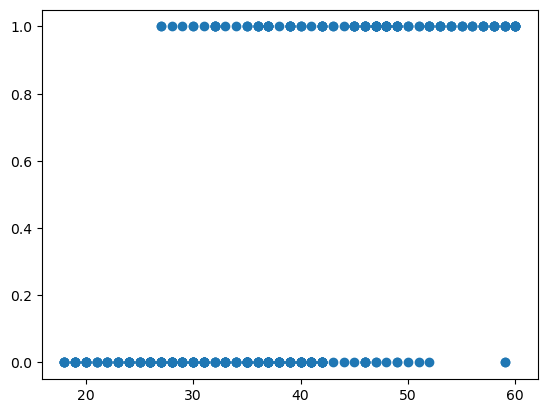

In [31]:
import matplotlib.pyplot as plt
plt.scatter(data.Age,data.Purchased)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [33]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [34]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [35]:
x=data.iloc[:,2:4]
x.shape

(400, 2)

In [36]:
y=data.iloc[:,4:5]
y.shape

(400, 1)

In [37]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
imputer.fit(x.iloc[:,0:2])

SimpleImputer()

In [38]:
x.iloc[:,0:2]=imputer.transform(x.iloc[:,0:2])

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [40]:
len(x_train),len(x_test),len(y_train),len(y_test)

(320, 80, 320, 80)

In [41]:
y_train.value_counts()

Purchased
0            206
1            114
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Purchased
0            51
1            29
Name: count, dtype: int64

In [43]:
# parameters = depth, criterion, min_impurity_decrease
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [44]:
y_pred=dt.predict(x_test)
y_pred,y_test.values.flatten()

(array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64),
 array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64))

In [45]:
y_test.shape

(80, 1)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[44,  7],
       [ 6, 23]], dtype=int64)

In [47]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.77      0.79      0.78        29

    accuracy                           0.84        80
   macro avg       0.82      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



In [48]:
#training accuracy
dt.score(x_train,y_train)

0.984375

In [49]:
#testing accuracy
dt.score(x_test,y_test)

0.8375

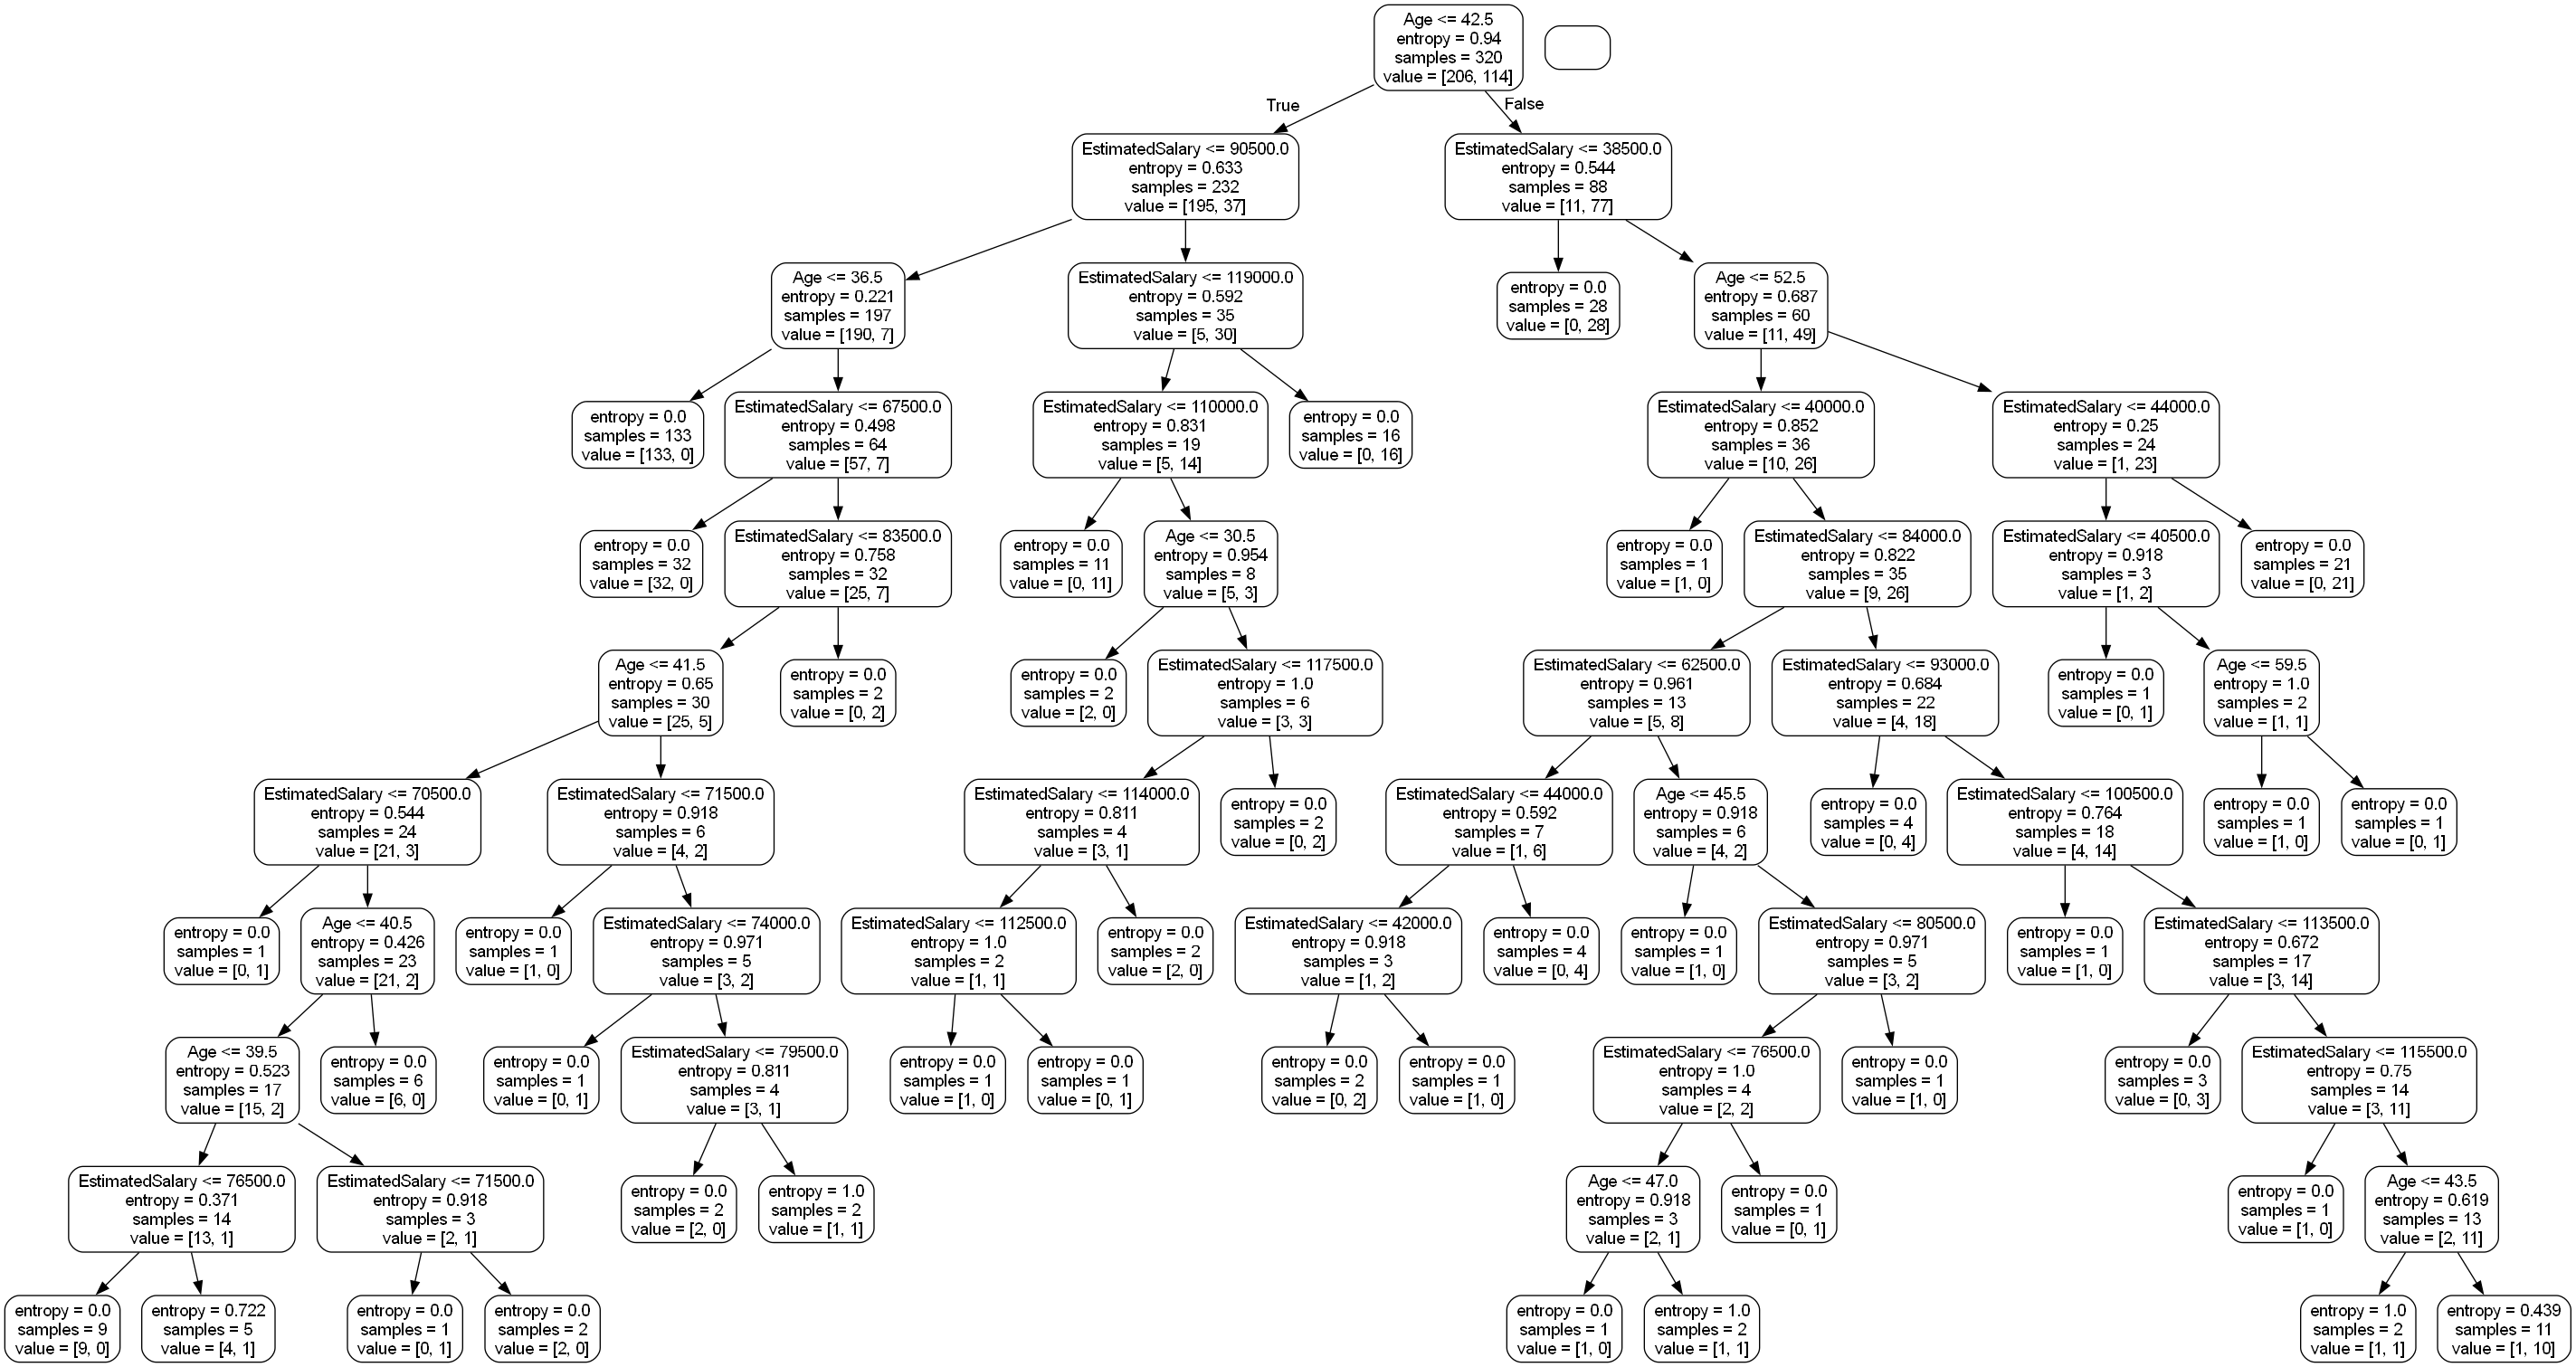

In [50]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    dt,
    out_file = dot_data,
    rounded = True,
    feature_names = ['Age', 'EstimatedSalary'],
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Text(50.722222222222214, 0.5, 'predicted value')

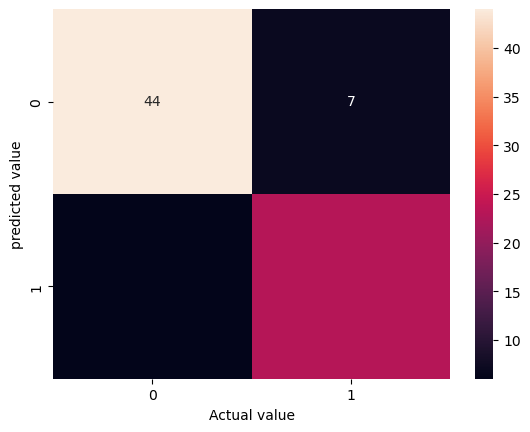

In [51]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Actual value')
plt.ylabel('predicted value')

In [52]:
dt.feature_importances_

array([0.45877441, 0.54122559])